In [1]:
%load_ext autoreload
%autoreload 2
import os
import numpy as np
from environment.main import PacMan
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import matplotlib.pyplot as plt
from Junru_Xiong_Qlearning.q_policy import q_policy
%matplotlib inline

In [2]:
from Junru_Xiong_Qlearning.main import PacManJX
from Junru_Xiong_Qlearning.q_policy import q_policy

In [4]:
game = PacManJX(maze_row_num=2, maze_column_num=2, maze_row_height=4, maze_column_width=4)
game.agent.policy = q_policy
game.random_reset()
game.setting.maximum_time = 200
game.generate_animation()
a=HTML(game.animation.to_jshtml())
print('\n',game.process.reward)
print('reward',game.process.current_reward)
a

Generated frames: 86
 -767
reward -99


In [5]:
game = PacManJX(maze_row_num=2, maze_column_num=2, maze_row_height=2, maze_column_width=2)
game.setting.maximum_time = 200
game.agent.policy = q_policy
game.random_reset()
while not game.process.termination:
        game.run_one_step_without_graph()
        print('reward---',game.process.current_reward)
print('total_reward',game.process.reward)
print('reward',game.process.current_reward)
# game.generate_animation()
# a=HTML(game.animation.to_jshtml())
# a

reward--- -99
total_reward -89
reward -99


Below is for debugging

In [57]:
gameee = PacManJX(maze_row_num=2, maze_column_num=2, maze_row_height=4, maze_column_width=4)
gameee.agent.policy = q_policy
gameee.setting.maximum_time = 300
rewards = []
for episode in range(90000):
    gameee.random_reset()
    while not gameee.process.termination:
        s = gameee.state()
        gameee.agent.epsilon_greedy_choose()
        gameee.run_one_step_without_graph()
        a = tuple(gameee.agent.direction_proposal)
        
        sp = gameee.state()
        r = gameee.process.current_reward
        s = tuple(s)
        max_value = max([gameee.agent.Q(sp, a) for a in gameee.agent.actions])
        gameee.agent.Q_values[(s, a)] = gameee.agent.Q(s, a) + gameee.agent.alpha * (r + gameee.agent.gamma * max_value - gameee.agent.Q(s, a))
        # print(gameee.agent.observe(s=s, a=a, sp=sp, r=r))
    rewards.append(gameee.process.reward)
plt.plot(rewards)
plt.show()
#print(game.process.reward)
# game.graphic.frame_figure

KeyboardInterrupt: 

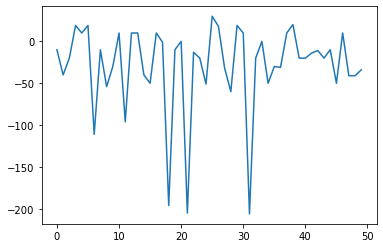

In [160]:
gameee = PacManJXPacManJX(maze_row_num=2, maze_column_num=2, maze_row_height=4, maze_column_width=4)
gameee.agent.policy = q_policy
gameee.setting.maximum_time = 200
rewards = []
for episode in range(50):
    gameee.random_reset()
    while not gameee.process.termination:
        s = gameee.state()
        gameee.agent.epsilon_greedy_choose()
        gameee.run_one_step_without_graph()
        a = tuple(gameee.agent.direction_proposal)
        
        sp = gameee.state()
        r = gameee.process.current_reward
        s = str(s)
        max_value = max([gameee.agent.Q(sp, a) for a in gameee.agent.actions])
        gameee.agent.Q_values[(s, a)] = gameee.agent.Q(s, a) + gameee.agent.alpha * (r + gameee.agent.gamma * max_value - gameee.agent.Q(s, a))
        # print(gameee.agent.observe(s=s, a=a, sp=sp, r=r))
    rewards.append(gameee.process.reward)
plt.plot(rewards)
plt.show()
#print(game.process.reward)
# game.graphic.frame_figure

In [48]:
gameee.random_reset()
gameee.generate_animation()
a=HTML(gameee.animation.to_jshtml())
print('\n',gameee.process.reward)
print('total_reward',gameee.process.win)
a

Generated frames: 38
 50
total_reward False


In [55]:
res = 0
for i in range(1000):
    gameee.random_reset()
    while not gameee.process.termination:
        gameee.run_one_step_without_graph()
#     print('total_reward',gameee.process.win)
    if gameee.process.win:
        res+=1
res

652